FORECASTING FOR THE WORLD

In [ ]:
#Creating the dataframe
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74200,ZWE,Africa,Zimbabwe,2021-03-07,36271.0,11.0,26.000,1485.0,0.0,3.143,2440.367,0.740,1.749,99.913,0.000,0.211,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32240.0,32240.0,NaN,226.0,1914.0,0.22,0.22,NaN,129.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74201,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,2441.578,1.211,1.672,100.048,0.135,0.183,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35518.0,35518.0,NaN,3278.0,2009.0,0.24,0.24,NaN,135.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74202,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,2443.731,2.153,1.663,100.182,0.135,0.163,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35761.0,35761.0,NaN,243.0,1526.0,0.24,0.24,NaN,103.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74203,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,2445.077,1.346,1.557,100.182,0.000,0.106,0.59,

In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74200,ZWE,Africa,Zimbabwe,2021-03-07,36271.0,11.0,26.000,1485.0,0.0,3.143,2440.367,0.740,1.749,99.913,0.000,0.211,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32240.0,32240.0,NaN,226.0,1914.0,0.22,0.22,NaN,129.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74201,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,2441.578,1.211,1.672,100.048,0.135,0.183,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35518.0,35518.0,NaN,3278.0,2009.0,0.24,0.24,NaN,135.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74202,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,2443.731,2.153,1.663,100.182,0.135,0.163,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35761.0,35761.0,NaN,243.0,1526.0,0.24,0.24,NaN,103.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74203,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,2445.077,1.346,1.557,100.182,0.000,0.106,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35901.0,35901.0,NaN,140.0,1133.0,0.24,0.24,NaN,76.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74204,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,22.000,1492.0,3.0,1.286,2447.499,2.422,1.480,100.384,0.202,0.087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36019.0,36019.0,NaN,118.0,766.0,0.24,0.24,NaN,52.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74205 entries, 0 to 74204
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               74205 non-null  object 
 1   continent                              70535 non-null  object 
 2   location                               74205 non-null  object 
 3   date                                   74205 non-null  object 
 4   total_cases                            73122 non-null  float64
 5   new_cases                              73120 non-null  float64
 6   new_cases_smoothed                     72119 non-null  float64
 7   total_deaths                           63923 non-null  float64
 8   new_deaths                             64081 non-null  float64
 9   new_deaths_smoothed                    72119 non-null  float64
 10  total_cases_per_million                72723 non-null  float64
 11  ne

In [ ]:
#Creating the dataframe required for forecasting
trend =df[['date','new_cases']]
trend

,date,new_cases
0,2020-02-24,1.0
1,2020-02-25,0.0
2,2020-02-26,0.0
3,2020-02-27,0.0
4,2020-02-28,0.0
...,...,...
74200,2021-03-07,11.0
74201,2021-03-08,18.0
74202,2021-03-09,32.0
74203,2021-03-10,20.0


In [ ]:
#Renaming the columns
trend.rename(columns = {'new_cases':'y','date':'ds'},inplace = True)
trend

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,y
0,2020-02-24,1.0
1,2020-02-25,0.0
2,2020-02-26,0.0
3,2020-02-27,0.0
4,2020-02-28,0.0
...,...,...
74200,2021-03-07,11.0
74201,2021-03-08,18.0
74202,2021-03-09,32.0
74203,2021-03-10,20.0


In [ ]:
#Checking the datatype
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74205 entries, 0 to 74204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      74205 non-null  object 
 1   y       73120 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
#Converting to the correct datatype
trend['ds'] = pd.to_datetime(trend['ds'])
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74205 entries, 0 to 74204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      74205 non-null  datetime64[ns]
 1   y       73120 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


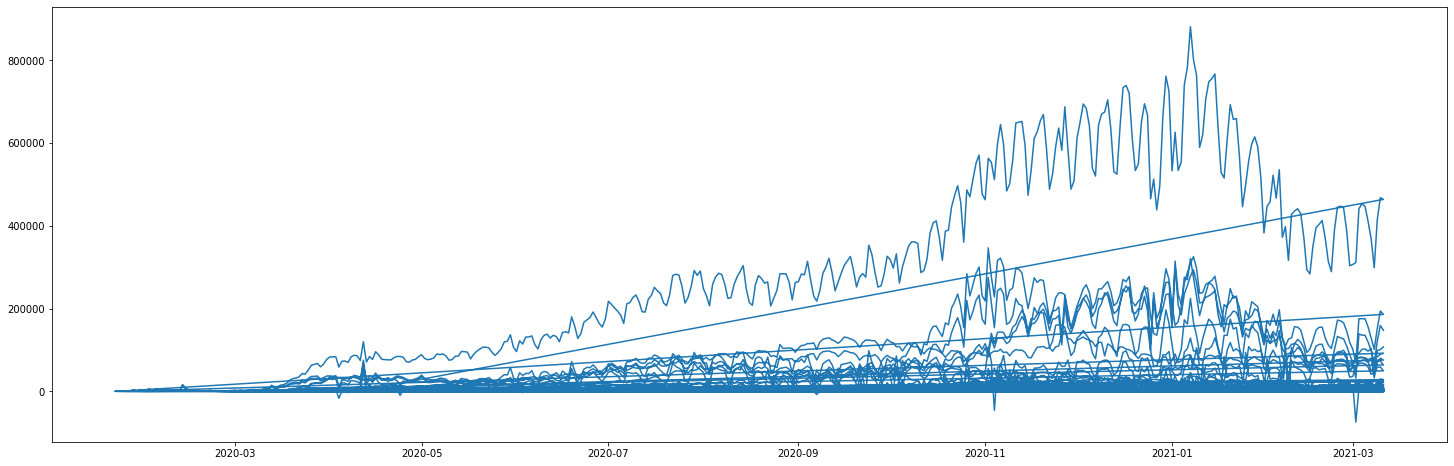

In [ ]:
#Plotting the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
plt.plot(trend['ds'],trend['y'])
plt.show()

In [ ]:
import fbprophet
op = fbprophet.Prophet()
op.fit(trend)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Making the forecast
forecast = op.make_future_dataframe(periods = 365, freq = 'D' )
forecast = op.predict(forecast) 

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,-465.371968,-40326.054349,40982.888967
1,2020-01-02,-313.973404,-43190.552641,40258.844066
2,2020-01-03,-392.598386,-41293.996879,42385.481213
3,2020-01-04,-935.881484,-40741.301352,38921.755816
4,2020-01-05,-1703.932290,-42164.922733,40002.776485
...,...,...,...,...
796,2022-03-07,-19109.067115,-66717.439976,28330.203265
797,2022-03-08,-18527.967724,-66648.123638,27915.500614
798,2022-03-09,-18107.768229,-67379.491753,32244.812259
799,2022-03-10,-18045.900430,-66003.254212,32155.550741


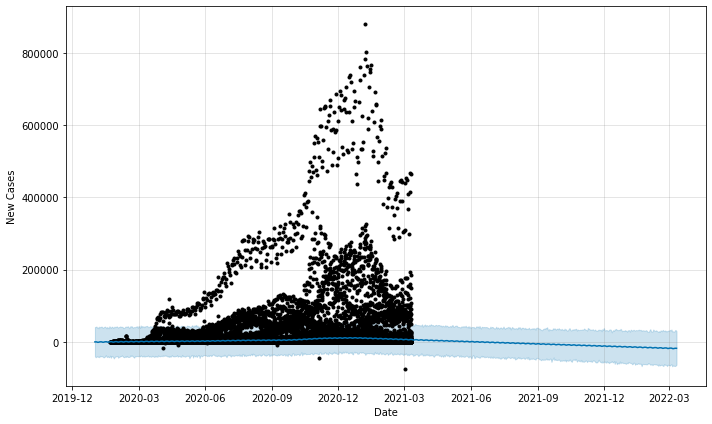

In [ ]:
#Plotting the forecast
op.plot(forecast, xlabel = 'Date', ylabel = 'New Cases');

FORECASTING FOR THE UNITED STATES OF AMERICA

In [ ]:
df_new1 = df.loc[df['location']=='United States']
df_new1.shape

(415, 59)

In [ ]:
df_new1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
70327,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
70328,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
70329,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
70330,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
70331,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70737,USA,North America,United States,2021-03-07,29075264.0,41022.0,59596.143,525041.0,673.0,1678.429,87839.974,123.933,180.047,1586.214,2.033,5.071,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90351750.0,58873710.0,30686881.0,2439427.0,2159392.0,27.02,17.60,9.18,6457.0,64.35,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
70738,USA,North America,United States,2021-03-08,29120348.0,45084.0,57607.286,525762.0,721.0,1564.571,87976.179,136.204,174.039,1588.392,2.178,4.727,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92089852.0,60005231.0,31493040.0,1738102.0,2169981.0,27.54,17.94,9.42,6488.0,64.35,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
70739,USA,North America,United States,2021-03-09,29178043.0,57695.0,57690.714,527710.0,1948.0,1567.429,88150.482,174.304,174.291,1594.277,5.885,4.735,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93692598.0,61088527.0,3

In [ ]:
df_new_trend1 = df_new1[['date','new_cases']]
df_new_trend1
df_new_trend1['date'] = pd.to_datetime(df_new_trend1['date'])
df_new_trend1.info()
df_new_trend1.rename(columns = {'new_cases':'y','date':'ds'},inplace = True)
df_new_trend1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70327 to 70741
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       415 non-null    datetime64[ns]
 1   new_cases  414 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.7 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
70327,2020-01-22,NaN
70328,2020-01-23,0.0
70329,2020-01-24,1.0
70330,2020-01-25,0.0
70331,2020-01-26,3.0
...,...,...
70737,2021-03-07,41022.0
70738,2021-03-08,45084.0
70739,2021-03-09,57695.0
70740,2021-03-10,58735.0


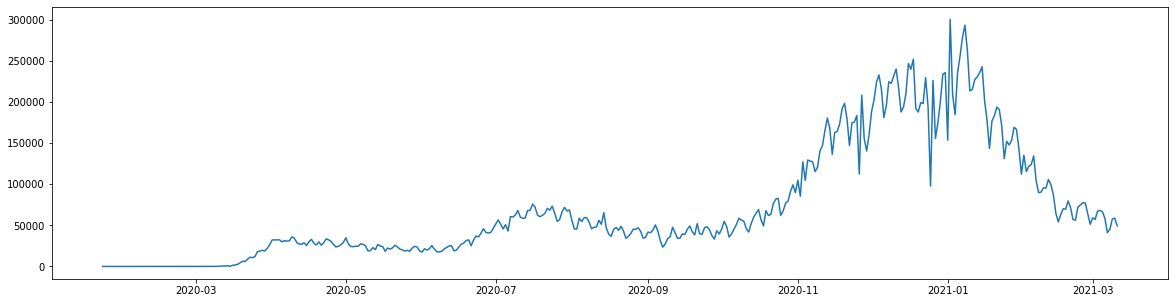

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_new_trend1['ds'],df_new_trend1['y'])
plt.show()

In [ ]:
op_new1 = fbprophet.Prophet()
op_new1.fit(df_new_trend1)
forecast_new1 = op_new1.make_future_dataframe(periods = 365, freq = 'D' )
forecast_new1 = op_new1.predict(forecast_new1)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_new1[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-447.662760,-2.608796e+04,24816.789904
1,2020-01-23,2333.323515,-2.334371e+04,30352.371938
2,2020-01-24,4072.358169,-2.300822e+04,29786.838448
3,2020-01-25,-211.404991,-2.515874e+04,26405.646697
4,2020-01-26,-12085.402251,-3.723033e+04,13708.220600
...,...,...,...,...
775,2022-03-07,-696689.782266,-1.182777e+06,-218962.934848
776,2022-03-08,-692147.797470,-1.189042e+06,-211480.737397
777,2022-03-09,-690377.685571,-1.185282e+06,-216398.203529
778,2022-03-10,-689923.501001,-1.184099e+06,-215893.253832


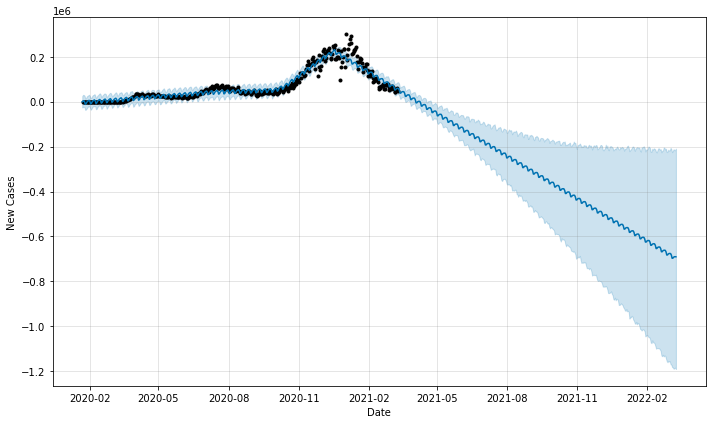

In [ ]:
op_new1.plot(forecast_new1, xlabel = 'Date', ylabel = 'New Cases');

CHECKING THE ACCURACY

In [ ]:
!pip install scikit-learn scipy

In [ ]:
metric_df_new = forecast.set_index('ds')[['yhat']].join(df_new_trend1.set_index('ds').y).reset_index()
df_new_trend1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70327 to 70741
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      415 non-null    datetime64[ns]
 1   y       414 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.7 KB


In [ ]:
metric_df_new.tail()

,ds,yhat,y
796,2022-03-07,-19109.067115,NaN
797,2022-03-08,-18527.967724,NaN
798,2022-03-09,-18107.768229,NaN
799,2022-03-10,-18045.900430,NaN
800,2022-03-11,-18214.056177,NaN


In [ ]:
metric_df_new.dropna(inplace = True)
metric_df_new.tail()

,ds,yhat,y
431,2021-03-07,5065.262203,41022.0
432,2021-03-08,5193.293608,45084.0
433,2021-03-09,5774.392999,57695.0
434,2021-03-10,6194.592494,58735.0
435,2021-03-11,6256.460293,49356.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(metric_df_new.y, metric_df_new.yhat)

-0.820144723792245

In [ ]:
mean_squared_error(metric_df_new.y, metric_df_new.yhat)

8747407421.85403

In [ ]:
mean_absolute_error(metric_df_new.y, metric_df_new.yhat)

66174.20289257157